In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

# from scipy.stats import norm
# from scipy import stats


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
trainer = pd.read_csv('data/train_u6lujuX_CVtuZ9i.csv')
tester = pd.read_csv('data/test_Y3wMUE5_7gLdaTN.csv')
print('Train shape: ',trainer.shape)
print('Test shape: ',tester.shape)

Train shape:  (614, 13)
Test shape:  (367, 12)


In [3]:
trainer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
trainer.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Exploratory Data Analysis

#### Lets check for Missing / Null values

In [5]:
total = trainer.isnull().sum().sort_values(ascending=False)
percentage = (trainer.isnull().sum()/trainer.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [6]:
columns = trainer.columns
myList=[]
 
for i in columns:
    i = i.lower()
    myList.append(i)
    print(i)

columns = myList
trainer.columns = columns

loan_id
gender
married
dependents
education
self_employed
applicantincome
coapplicantincome
loanamount
loan_amount_term
credit_history
property_area
loan_status


In [7]:
# but first let me make the feature names uniform-change all to small letters
columns = trainer.columns
myList=[]
 
for i in columns:
    i = i.lower()
    myList.append(i)
    print(i)

columns = myList
trainer.columns = columns

loan_id
gender
married
dependents
education
self_employed
applicantincome
coapplicantincome
loanamount
loan_amount_term
credit_history
property_area
loan_status


In [8]:
#check again
trainer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    object 
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<AxesSubplot:xlabel='dependents', ylabel='count'>

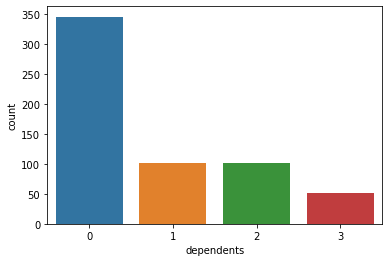

In [9]:
# Lets clean some the data existent in some columns to ensure consistency
trainer['dependents'] = trainer['dependents'].str.rstrip('+')
trainer['dependents'].value_counts()

sns.countplot(x=trainer['dependents'])

Male      489
Female    112
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

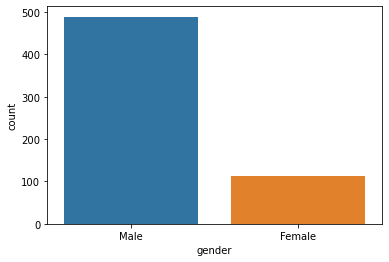

In [10]:
# gender column
print(trainer['gender'].value_counts())
sns.countplot(x=trainer['gender'])

There are a large number of males, so its obvious when I use mode to fill in null values


In [11]:
# trainer['gender'] = trainer['gender'].fillna( 
#                                trainer['gender'].dropna().mode().values[0] )

In [12]:
# trainer['gender'] = trainer['gender'].fillna( 
#                                trainer['gender'].dropna().mode().values[0] )
# print(trainer['gender'].value_counts())

In [13]:
# trainer['gender'] = trainer['gender'].fillna( 
#                                trainer['gender'].dropna().mode().values[0] )
# trainer['gender'] = trainer['gender'].map({'Female':0,'Male':1}).astype(np.int)
# trainer['gender']

In [14]:
#fill NaN Values for the rest
# trainer['married'] = trainer['married'].fillna( trainer['married'].dropna().mode().values[0] )
# trainer['dependents'] = trainer['dependents'].fillna( trainer['dependents'].dropna().mode().values[0] )
# trainer['self_employed'] = trainer['self_employed'].fillna( trainer['self_employed'].dropna().mode().values[0] )
# trainer['loanamount'] = trainer['loanamount'].fillna( trainer['loanamount'].dropna().mean() )
# trainer['loan_amount_term'] = trainer['loan_amount_term'].fillna( trainer['loan_amount_term'].dropna().mode().values[0] )
# trainer['credit_history'] = trainer['credit_history'].fillna( trainer['credit_history'].dropna().mode().values[0] )


In [15]:
# trainer['married'] = trainer['married'].map({'No':0, 'Yes':1}).astype(np.int)
# trainer['education'] = trainer['education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
# trainer['self_employed'] = trainer['self_employed'].map({'No':0, 'Yes':1}).astype(np.int)
# trainer['loan_status'] = trainer['loan_status'].map({'N':0, 'Y':1}).astype(np.int)
# trainer['dependents'] = trainer['dependents'].astype(np.int)

In [16]:
trainer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    object 
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [17]:
trainer['property_area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: property_area, dtype: int64

In [18]:
trainer['credit_history'].value_counts()

1.0    475
0.0     89
Name: credit_history, dtype: int64

### Lets apply whatever we have done to test set too

In [19]:
columns_t = tester.columns
myTest=[]
 
for i in columns_t:
    i = i.lower()
    myTest.append(i)
    print(i)

columns_t = myTest
tester.columns = columns_t

loan_id
gender
married
dependents
education
self_employed
applicantincome
coapplicantincome
loanamount
loan_amount_term
credit_history
property_area


In [20]:
tester.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            367 non-null    object 
 1   gender             356 non-null    object 
 2   married            367 non-null    object 
 3   dependents         357 non-null    object 
 4   education          367 non-null    object 
 5   self_employed      344 non-null    object 
 6   applicantincome    367 non-null    int64  
 7   coapplicantincome  367 non-null    int64  
 8   loanamount         362 non-null    float64
 9   loan_amount_term   361 non-null    float64
 10  credit_history     338 non-null    float64
 11  property_area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [21]:
tester.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [22]:
tester['dependents'] = tester['dependents'].str.rstrip('+')
# tester['gender'] = tester['gender'].fillna( 
#                                tester['gender'].dropna().mode().values[0] )
# tester['gender'] = tester['gender'].map({'Female':0,'Male':1}).astype(np.int)
# tester['gender']


In [23]:
# #fill NaN Values 
# tester['married'] = tester['married'].fillna( tester['married'].dropna().mode().values[0] )
# tester['dependents'] = tester['dependents'].fillna( tester['dependents'].dropna().mode().values[0] )
# tester['self_employed'] = tester['self_employed'].fillna( tester['self_employed'].dropna().mode().values[0] )
# tester['loanamount'] = tester['loanamount'].fillna( tester['loanamount'].dropna().mean() )
# tester['loan_amount_term'] = tester['loan_amount_term'].fillna( tester['loan_amount_term'].dropna().mode().values[0] )
# tester['credit_history'] = tester['credit_history'].fillna( tester['credit_history'].dropna().mode().values[0] )

In [24]:
# # #convert objects to categorical data
# tester['married'] = tester['married'].map({'No':0, 'Yes':1}).astype(np.int)
# tester['education'] = tester['education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
# tester['self_employed'] = tester['self_employed'].map({'No':0, 'Yes':1}).astype(np.int)
# tester['dependents'] = tester['dependents'].astype(np.int)

In [25]:
tester.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [26]:
# lets check  correlations
# trainer.corr()['loan_status'].sort_values().plot(kind='bar', figsize=(18, 6))

In [27]:
import fastai
from fastai.tabular.all import *

In [28]:
trainer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    object 
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [29]:
dep_var = 'loan_status'
cat_var= ['gender','married','dependents','education','self_employed','property_area','credit_history']

cont_var =  ['applicantincome','coapplicantincome','loanamount','loan_amount_term']
print('Categorical Variables: ',cat_var)
print('Continuous Variables: ',cont_var)

Categorical Variables:  ['gender', 'married', 'dependents', 'education', 'self_employed', 'property_area', 'credit_history']
Continuous Variables:  ['applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term']


In [30]:
procs = [FillMissing,Categorify,Normalize]

In [31]:
#seeds 40,41,42,43,44,45
dls=TabularDataLoaders.from_df(trainer, y_names=dep_var,
                               cat_names=cat_var,
                               cont_names=cont_var,
                               seed=41,
                               valid_pct=0.3,
                               bs=32,
                               procs=procs)

In [32]:
splits= RandomSplitter(valid_pct=0.2)(range_of(trainer))

to = TabularPandas(trainer,procs=procs,
                    cat_names=cat_var,
                    cont_names=cont_var,
                    y_names=dep_var,
                    splits=splits)

In [33]:
# checking to make sure all numerical values have been normalized
to.xs.iloc[:5]

,gender,married,dependents,education,self_employed,property_area,credit_history,loanamount_na,loan_amount_term_na,applicantincome,coapplicantincome,loanamount,loan_amount_term
68,2,2,4,2,2,3,2,1,1,0.437086,-0.543807,-0.221557,-4.305899
103,2,2,1,1,1,2,2,2,1,-0.071082,0.592295,-0.221557,0.277620
574,2,2,4,1,1,2,2,1,1,0.293022,-0.543807,0.124758,0.277620
379,2,2,3,1,1,3,2,1,1,0.082323,-0.543807,-0.152294,0.277620
292,2,2,3,1,1,3,2,1,1,-0.382252,-0.049160,-0.096884,0.277620


In [34]:
dls = to.dataloaders(bs=32)
dls.show_batch()

,gender,married,dependents,education,self_employed,property_area,credit_history,loanamount_na,loan_amount_term_na,applicantincome,coapplicantincome,loanamount,loan_amount_term,loan_status
0,Male,Yes,0,Graduate,No,Semiurban,1.0,False,False,14582.999943,0.000002,435.999999,360.000001,Y
1,Male,Yes,1,Graduate,No,Urban,1.0,False,False,8079.999923,2250.000006,179.999999,360.000001,Y
2,Male,Yes,3,Graduate,No,Rural,1.0,False,False,6417.000050,0.000002,157.000000,179.999999,Y
3,Male,Yes,0,Graduate,No,Semiurban,1.0,False,False,3246.000011,1417.000004,138.000000,360.000001,Y
4,Female,No,0,Graduate,No,Semiurban,0.0,False,False,2137.999914,0.000002,99.000000,360.000001,N
5,Male,Yes,2,Graduate,No,Urban,1.0,False,False,4005.999970,1525.999995,168.000000,360.000001,Y
6,Male,Yes,2,Graduate,No,Semiurban,1.0,False,False,3900.000005,0.000002,89.999999,360.000001,Y
7,Male,No,0,Graduate,No,Rural,1.0,False,False,20232.999520,0.000002,480.000005,360.000001,N
8,Male,Yes,0,Graduate,No,Semiurban,1.0,False,False,3940.999984,2336.000005,134.000000,360.000001,Y
9,Male,Yes,0,Graduate,Yes,Urban,1.0,False,False,16119.999618,0.000002,259.999998,360.000001,Y


In [35]:
learn = tabular_learner(dls,metrics=accuracy, layers=[60,120])

SuggestedLRs(valley=0.004365158267319202)

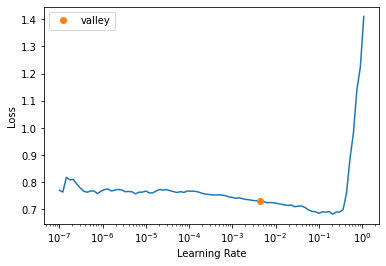

In [36]:
learn.lr_find()

In [37]:
learn.fit_one_cycle(15,slice(0.004365158267319202))

epoch,train_loss,valid_loss,accuracy,time
0,0.718221,0.685693,0.655738,00:00
1,0.703987,0.655671,0.672131,00:00
2,0.666444,0.654147,0.729508,00:00
3,0.609848,0.570337,0.770492,00:00
4,0.565043,0.528842,0.762295,00:00
5,0.525763,0.558980,0.754098,00:00
6,0.504535,0.518263,0.770492,00:00
7,0.493545,0.570343,0.762295,00:00
8,0.469738,0.559036,0.795082,00:00
9,0.453705,0.555032,0.770492,00:00


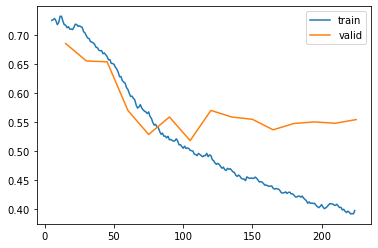

In [38]:
learn.recorder.plot_loss()

In [118]:
learn.fit_one_cycle(15,slice(0.00363078061491251))

epoch,train_loss,valid_loss,accuracy,time
0,0.393708,0.530699,0.770492,00:00
1,0.400514,0.557857,0.762295,00:00
2,0.399967,0.532037,0.778689,00:00
3,0.431545,0.650623,0.737705,00:00
4,0.442674,0.702759,0.754098,00:00
5,0.439588,0.632040,0.754098,00:00
6,0.424529,0.592449,0.737705,00:00
7,0.417900,0.608055,0.754098,00:00
8,0.408504,0.580647,0.778689,00:00
9,0.390499,0.583273,0.770492,00:00


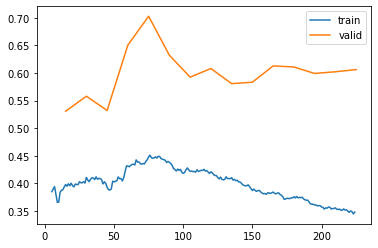

In [119]:
learn.recorder.plot_loss()

In [1]:
#get predictions on validation set
preds, y = learn.get_preds()

error = preds -y
plt.hist(error.detach().numpy(),bins = 25, color =('Blue'),density = False)
plt.axvline(error.mean(), color ='k', linestyle = 'dashed', linewidth=3)
plt.xlabel("Prediction Error [labels]")
_ = plt.ylabel("Count")

In [62]:
# Predict on test set

In [42]:
test_df = tester
# test_df = rest
# test_df.drop(['CHURN'], axis=1, inplace=True)

dl = learn.dls.test_dl(test_df)

In [43]:
dl.xs.iloc[:5]

,gender,married,dependents,education,self_employed,property_area,credit_history,loanamount_na,loan_amount_term_na,applicantincome,coapplicantincome,loanamount,loan_amount_term
0,2,2,1,1,1,3,2,1,1,0.150619,-0.543807,-0.429346,0.27762
1,2,2,2,1,1,3,2,1,1,-0.398236,-0.068185,-0.207704,0.27762
2,2,2,3,1,1,3,2,1,1,0.001158,0.026939,0.928208,0.27762
3,2,2,3,1,1,3,0,1,1,-0.551018,0.263482,-0.567872,0.27762
4,2,1,1,2,1,3,2,1,1,-0.356719,-0.543807,-0.872629,0.27762


In [44]:
learn.get_preds(dl=dl)

(tensor([[0.2262, 0.7738],
         [0.1485, 0.8515],
         [0.2209, 0.7791],
         [0.0334, 0.9666],
         [0.4009, 0.5991],
         [0.0990, 0.9010],
         [0.1745, 0.8255],
         [0.9460, 0.0540],
         [0.1465, 0.8535],
         [0.0285, 0.9715],
         [0.3576, 0.6424],
         [0.1706, 0.8294],
         [0.1078, 0.8922],
         [0.8036, 0.1964],
         [0.0709, 0.9291],
         [0.2239, 0.7761],
         [0.1965, 0.8035],
         [0.0504, 0.9496],
         [0.2505, 0.7495],
         [0.4677, 0.5323],
         [0.2723, 0.7277],
         [0.3293, 0.6707],
         [0.3322, 0.6678],
         [0.3133, 0.6867],
         [0.3755, 0.6245],
         [0.9474, 0.0526],
         [0.0628, 0.9372],
         [0.3644, 0.6356],
         [0.0358, 0.9642],
         [0.4267, 0.5733],
         [0.0791, 0.9209],
         [0.1721, 0.8279],
         [0.0595, 0.9405],
         [0.1192, 0.8808],
         [0.0579, 0.9421],
         [0.5742, 0.4258],
         [0.2635, 0.7365],
 

In [43]:
ss=pd.read_csv('data/my_submission7.csv')

In [44]:
ss.columns

Index(['Loan_ID', 'Loan_Status'], dtype='object')

In [45]:
# ss.drop('loan_status')

In [46]:
ss

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [117]:
# # create a list of our conditions
# # break into intervals of 15%
# conditions = [
#     (ss['loan_status'] <= 0.49),
#     (ss['loan_status'] >= 0.50) & (ss['loan_status'] <= 0.75),
#     (ss['loan_status'] > 0.75) & (ss['loan_status'] <= 0.85),
#     (ss['loan_status'] > 0.85) & (ss['loan_status'] <= 1.0)
#     ]

# # create a list of the values we want to assign for each condition
# values = ['bad','fair','good','excellent']

# # create a new column and use np.select to assign values to it using our lists as arguments
# ss['probability'] = np.select(conditions, values)

# # display updated DataFrame
# ss.head(20)

In [48]:
i=1
# !mkdir models

In [49]:
# Look at the sample submission file
# ss = pd.read_csv('SampleSubmission.csv')
preds, y = learn.get_preds(dl=dl)
ss['loan_status'] = preds[:,0]

# Save ready for submission:
name = 'models/ensamble_'+ str(i) +'.csv'
ss.to_csv(name, index=False)
i += 1

In [50]:
md=pd.read_csv('models/ensamble_1.csv')
md

,Loan_ID,Loan_Status,loan_status
0,LP001015,Y,0.228062
1,LP001022,Y,0.181972
2,LP001031,Y,0.267816
3,LP001035,Y,0.051920
4,LP001051,Y,0.307060
...,...,...,...
362,LP002971,Y,0.185429
363,LP002975,Y,0.152487
364,LP002980,Y,0.031549
365,LP002986,Y,0.200379


In [47]:
md['Loan_Status'].value_counts()

In [73]:
tester.tail(10)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
357,LP002952,1,0,0,1,0,2500,0,60.0,360.0,1.0,Urban
358,LP002954,1,1,2,0,0,3132,0,76.0,360.0,1.0,Rural
359,LP002962,1,0,0,1,0,4000,2667,152.0,360.0,1.0,Semiurban
360,LP002965,0,1,0,1,0,8550,4255,96.0,360.0,1.0,Urban
361,LP002969,1,1,1,1,0,2269,2167,99.0,360.0,1.0,Semiurban
362,LP002971,1,1,3,0,1,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,1,1,0,1,0,4158,709,115.0,360.0,1.0,Urban
364,LP002980,1,0,0,1,0,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,1,1,0,1,0,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,1,0,0,1,1,9200,0,98.0,180.0,1.0,Rural


In [52]:
import pickle

In [53]:
learn.export('borrowerV2.pkl')

In [54]:
test_df.iloc[0:5]

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [45]:

    
t = [1,2,3,4,10]

rest = pd.read_csv('test.csv')


for i in t:
    row, clas, probs = learn.predict(test_df.iloc[i])

    conditions = [
    (probs[1] <= 0.49),
    (probs[1] >= 0.50) & (probs[1] <= 0.75),
    (probs[1] > 0.75) & (probs[1] <= 0.85),
    (probs[1] > 0.85) & (probs[1] <= 1.0)
    ]

    # create a list of the values we want to assign for each condition
    values = ['bad','fair','good','excellent']

    # create a new column and use np.select to assign values to it using our lists as arguments
    probab = np.select(conditions, values)
    row.show()
    print(probs[1],probab)
#     print(row,clas,probs,probab)


    #     print(probs)

,gender,married,dependents,education,self_employed,property_area,credit_history,loanamount_na,loan_amount_term_na,applicantincome,coapplicantincome,loanamount,loan_amount_term,loan_status
0,Male,Yes,1,Graduate,No,Urban,1.0,False,False,3076.000003,1499.999997,126.0,360.000001,Y


tensor(0.8515) excellent


,gender,married,dependents,education,self_employed,property_area,credit_history,loanamount_na,loan_amount_term_na,applicantincome,coapplicantincome,loanamount,loan_amount_term,loan_status
0,Male,Yes,2,Graduate,No,Urban,1.0,False,False,5000.0,1800.000003,207.999999,360.000001,Y


tensor(0.7791) good


,gender,married,dependents,education,self_employed,property_area,credit_history,loanamount_na,loan_amount_term_na,applicantincome,coapplicantincome,loanamount,loan_amount_term,loan_status
0,Male,Yes,2,Graduate,No,Urban,#na#,False,False,2339.999979,2545.999992,100.0,360.000001,Y


tensor(0.9666) excellent


,gender,married,dependents,education,self_employed,property_area,credit_history,loanamount_na,loan_amount_term_na,applicantincome,coapplicantincome,loanamount,loan_amount_term,loan_status
0,Male,No,0,Not Graduate,No,Urban,1.0,False,False,3276.000038,0.000002,78.000001,360.000001,Y


tensor(0.5991) fair


,gender,married,dependents,education,self_employed,property_area,credit_history,loanamount_na,loan_amount_term_na,applicantincome,coapplicantincome,loanamount,loan_amount_term,loan_status
0,Male,No,0,Not Graduate,No,Urban,1.0,False,False,3091.000016,0.000002,89.999999,360.000001,Y


tensor(0.6424) fair


In [80]:
print(test_df.iloc[65])

loan_id               LP001351
gender                    Male
married                    Yes
dependents                   0
education             Graduate
self_employed               No
applicantincome           2917
coapplicantincome         3583
loanamount               138.0
loan_amount_term         360.0
credit_history             1.0
property_area        Semiurban
Name: 65, dtype: object


In [55]:
V1 = load_learner("borrowerV2.pkl")


In [56]:
V1

In [57]:
tester.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            367 non-null    object 
 1   gender             356 non-null    object 
 2   married            367 non-null    object 
 3   dependents         357 non-null    object 
 4   education          367 non-null    object 
 5   self_employed      344 non-null    object 
 6   applicantincome    367 non-null    int64  
 7   coapplicantincome  367 non-null    int64  
 8   loanamount         362 non-null    float64
 9   loan_amount_term   361 non-null    float64
 10  credit_history     338 non-null    float64
 11  property_area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [108]:
# n_pred = V1.predict(new_user)

In [60]:
new_pred = V1.predict(test_df.iloc[3])

In [94]:
test_df.iloc[3]

loan_id                  LP001135
gender                     Female
married                        No
dependents                      0
education            Not Graduate
self_employed                  No
applicantincome              3765
coapplicantincome               0
loanamount                    125
loan_amount_term              360
credit_history                  1
property_area               Urban
Name: 3, dtype: object

In [113]:
print(new_pred)

(   gender  married  dependents  education  self_employed  property_area  \
0     2.0      2.0         3.0        1.0            1.0            3.0   

   credit_history  loanamount_na  loan_amount_term_na  applicantincome  \
0             0.0            1.0                  1.0        -0.476662   

   coapplicantincome  loanamount  loan_amount_term  loan_status  
0           0.410976   -0.519199           0.27445          1.0  , tensor(1), tensor([0.0519, 0.9481]))
